We will try to find the regression line using Ordinary Least Squares Method, MLE, Gradient Descent

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from scipy.optimize import minimize
import matplotlib.pyplot as plt

Generate the data 

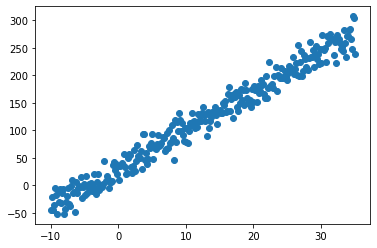

In [2]:
# generate an independent variable 
x = np.linspace(-10, 35, 300)
# generate a normally distributed noise
e = np.random.normal(0, 15, 300)
# generate ground truth
y = 32 + 7*x + e


plt.scatter(x,y)

Define a function OLS that will return you the two parameters for the line (slope and intercept)

In [3]:
def ols(x,y):
    b1 = np.sum((x-np.mean(x))*(y-np.mean(y)))/np.sum((x-np.mean(x))**2)
    b0 = np.mean(y) - b1*np.mean(x)
    return(b0,b1)

Get the parameters, and predict y using the resultant line 

Intercept, slope:  31.025346638210323 7.012200621757899


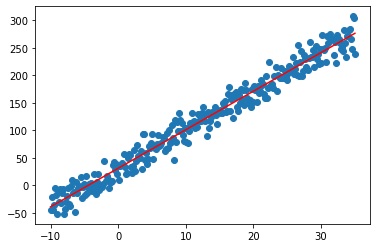

In [4]:
intercept_ols, slope_ols = ols(x,y)

print('Intercept, slope: ',intercept_ols, slope_ols )

y_vals = intercept_ols + slope_ols*x

plt.scatter(x,y)
plt.plot([min(x), max(x)], [min(y_vals), max(y_vals)], color='red')  # regression line

Define a function MLE that will return you the negative log likelihood function. You'll need a initial estimate of b0,b1 and s**2 to generate the pdf.
We use the Negative Log Likelihood because we can use the minimize function to maximize the log liklihood.

In [5]:
def MLE(parameters,x,y):
    # extract parameters
    b0, b1, std_dev = parameters
    # predict the output
    pred = b0 + b1*x
    # Calculate the log-likelihood for normal distribution
    LL = np.sum(stats.norm.logpdf(y-pred, loc = 0, scale=std_dev))
    # Calculate the negative log-likelihood
    neg_LL = -LL
    return neg_LL



Minimize the above function with intial_guess_of_parameters [2,2,2]
minimize arguments: function, intial_guess_of_parameters, args=(x,y), method 'L-BFGS-B'

      fun: 1248.835406725483
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00011369, -0.00266027, -0.00015916])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 148
      nit: 35
     njev: 37
   status: 0
  success: True
        x: array([31.02534952,  7.01219398, 15.54661067])
Intercept, slope:  31.025349524087147 7.012193977147074


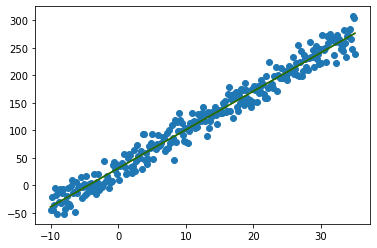

In [6]:
# minimize arguments: function, intial_guess_of_parameters, args=(x,y), method 'L-BFGS-B'
mle_model = minimize(MLE, [0,0,1], args=(x,y), method='L-BFGS-B')
print(mle_model)
    
intercept_mle = mle_model.x[0]
slope_mle = mle_model.x[1]
    
print('Intercept, slope: ',intercept_mle, slope_mle)    
y_vals_mle = intercept_mle + slope_mle*x

plt.scatter(x,y)
plt.plot([min(x), max(x)], [min(y_vals), max(y_vals)], color='red')  # regression line
plt.plot([min(x), max(x)], [min(y_vals_mle), max(y_vals_mle)], color='green')  # regression line    

Use Gradient Descent to find the parameters of the line. Function gradient_descent will take parameters initial_guess, Learning_rate, number_of_epochs, x,y

In [7]:
def gradient_descent(initial_guess, Learning_rate, number_of_epochs, x,y):

# Building the model
    m,c = initial_guess

    L = Learning_rate
    epochs =number_of_epochs

    n = float(len(x)) # Number of elements in X

    # Performing Gradient Descent 
    for i in range(epochs): 
        Y_pred = m*x + c  # The current predicted value of Y  
        D_m = (-2/n) * sum(x * (y - Y_pred))  # Derivative wrt m
        D_c = (-2/n) * sum(y - Y_pred)  # Derivative wrt c
        m = m - L * D_m  # Update m
        c = c - L * D_c  # Update c

    return (m, c)

Use the above function with intial_guess_of_parameters [2,2]

Intercept, slope:  20.173835502269743 7.42878628751066


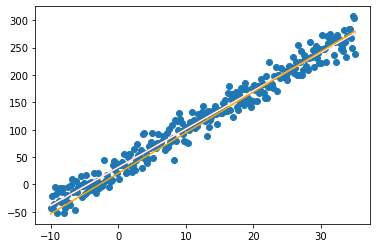

In [8]:
slope_gd,intercept_gd= gradient_descent(initial_guess=[0,0], Learning_rate=0.0001, number_of_epochs=10000, x=x,y=y)

print('Intercept, slope: ',intercept_gd, slope_gd)

y_vals_gd = intercept_gd + slope_gd*x


plt.scatter(x,y)
plt.plot([min(x), max(x)], [min(y_vals), max(y_vals)], color='red')  # regression line
plt.plot([min(x), max(x)], [min(y_vals_mle), max(y_vals_mle)], color='white')  # regression line   
plt.plot([min(x), max(x)], [min(y_vals_gd), max(y_vals_gd)], color='orange')  # regression line    

Lets check our values with the library statsmodels

In [9]:
from statsmodels import api

features = api.add_constant(x)
model = api.OLS(y, features).fit()

res = model.resid
standard_dev = np.std(res)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 1.030e+04
Date:                Thu, 06 Oct 2022   Prob (F-statistic):          3.78e-233
Time:                        18:39:44   Log-Likelihood:                -1248.8
No. Observations:                 300   AIC:                             2502.
Df Residuals:                     298   BIC:                             2509.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.0253      1.248     24.864      0.000      28.570      33.481
x1             7.0122      0.069    101.483      0.000       6.876       7.148
==============================================================================
Omnibus:                        1.808   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.405   Jarque-Bera (JB):                1.576
Skew:                           0.037   Prob(JB):                        0.455
Kurtosis:                       2.653   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""